In [1]:
# Artificial Neural Network for Hand written digits
# Rahim Abdulmalik

# libraries
import numpy as np
import os
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [2]:
# Import the Data

# Import Classes for training and test data
y_train_original = np.genfromtxt('train01.csv', delimiter=',', dtype='float32')
y_test_original = np.genfromtxt('test01.csv', delimiter= ',', dtype='float32')
train_y = np.delete(y_train_original,1,1)
test_y = np.delete(y_test_original,1,1)
train_label = np.reshape(train_y,(12665))
test_label = np.reshape(test_y,(2115))

# Import Training/Test Data
train1 = os.listdir('train/')
test1 = os.listdir('test/')

train_x = np.empty(shape=(len(train1),28,28), dtype='float32')
test_x = np.empty(shape=(len(test1),28,28), dtype='float32')

for i in range(0,len(train1)):
    tr = io.imread(f'train/{train1[i]}')
    train_x[i,:,:] = tr
    
for o in range(0,len(test1)):
    te = io.imread(f'test/{test1[o]}')
    test_x[o,:,:] = te
    
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(12665, 28, 28)
(2115, 28, 28)
(12665, 1)
(2115, 1)


In [3]:
# Normalizing and preparing Data

# Reshaping and Normalizing training/test data
train_df = train_x.reshape((12665,28*28))
train_df = train_df/255

test_df = test_x.reshape((2115,28*28))
test_df = test_df/255

print(test_label[0])
print(test_df.shape)
print(np.max(train_df))
print(train_df.shape)

1.0
(2115, 784)
1.0
(12665, 784)


In [4]:
# Constructing Models
# Model 1

# Building Model 1
model1 = Sequential()
model1.add(Dense(1,input_shape=(train_df.shape[1],)))
model1.add(Activation('sigmoid'))
print(model1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Training Model 1
print(train_df.shape)
print(train_label.shape)
model1.compile(loss='binary_crossentropy', optimizer = 'RMSprop', metrics = 'accuracy')
tuning1 = model1.fit(train_df,train_label,epochs=150, batch_size=30, verbose=1,validation_split=0.2, 
                     callbacks=EarlyStopping(monitor='val_loss',patience = 8))

(12665, 784)
(12665,)
Epoch 1/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5189 - val_loss: 0.7082 - val_accuracy: 0.5105
Epoch 2/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5293 - val_loss: 0.6971 - val_accuracy: 0.5266
Epoch 3/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5231 - val_loss: 0.6975 - val_accuracy: 0.5160
Epoch 4/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5302 - val_loss: 0.6930 - val_accuracy: 0.5132
Epoch 5/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5313 - val_loss: 0.6976 - val_accuracy: 0.5215
Epoch 6/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5340 - val_loss: 0.6944 - val_accuracy: 0.5239
Epoch 7/150
338/338 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5341 - val_loss: 0.7031 

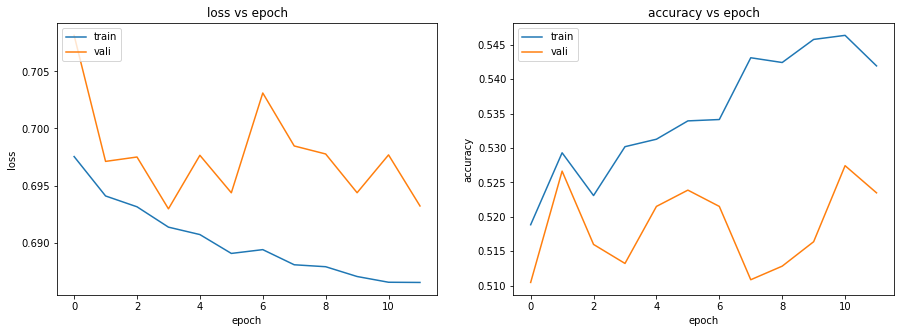

None


In [6]:
# Setting up plot

def standard_plot(tuning):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(tuning.history['loss'])
    axs[0].plot(tuning.history['val_loss'])
    axs[0].set_title('loss vs epoch')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'vali'], loc='upper left')
    
    axs[1].plot(tuning.history['accuracy'])
    axs[1].plot(tuning.history['val_accuracy'])
    axs[1].set_title('accuracy vs epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'vali'], loc='upper left')
    plt.show(block = False)
    plt.show()
    
    
# accuracy and loss vs epoch for model 1
print(standard_plot(tuning1))

In [7]:
#Predict Accuracy

pred_test1 = model1.predict_classes(test_df)
pred_train1 = model1.predict_classes(train_df)

#Training Accuracy
train_classes1 = train_label
print(f'The training accuracy for model 1 is: {round(accuracy_score(train_classes1,pred_train1),4):.2%}')

#Test Accuracy
test_classes1 = test_label
print(f'The test accuracy for model 1 is: {round(accuracy_score(test_classes1,pred_test1),4):.2%}')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The training accuracy for model 1 is: 55.54%
The test accuracy for model 1 is: 49.79%


In [8]:
# Model 1 Analysis
'''
Ultimately there are a low number of samples which is why the test accuracy was a low 49.79%, which is no different from guessing
'''

'\nDue to only having a total of 785 parameters and having no hidden layers, the model 1 accuracy was\npredicted to be very low of 53% which is pretty much no different than guessing\n'

In [9]:
# Model 2

# Building Model 2
model2 = Sequential()
model2.add(Dense(200,input_shape=(train_df.shape[1],),activation='relu'))
model2.add(Dense(200))
model2.add(Dropout(0.20))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 197,401
Trainable params: 197,401
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# Training Model 1
model2.compile(loss='binary_crossentropy', optimizer = 'SGD', metrics = 'accuracy')
tuning2 = model2.fit(train_df,train_label,epochs=150, batch_size=30, verbose=1,validation_split=0.2, 
                     callbacks=EarlyStopping(monitor='val_loss',patience = 8))

Epoch 1/150
338/338 [==============================] - 1s 3ms/step - loss: 0.6999 - accuracy: 0.5181 - val_loss: 0.6952 - val_accuracy: 0.5034
Epoch 2/150
338/338 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.5229 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5302 - val_loss: 0.6982 - val_accuracy: 0.5136
Epoch 4/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5271 - val_loss: 0.6937 - val_accuracy: 0.5101
Epoch 5/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5372 - val_loss: 0.6932 - val_accuracy: 0.5105
Epoch 6/150
338/338 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.5336 - val_loss: 0.6936 - val_accuracy: 0.5089
Epoch 7/150
338/338 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.5423 - val_loss: 0.6941 - val_accuracy: 0.5109

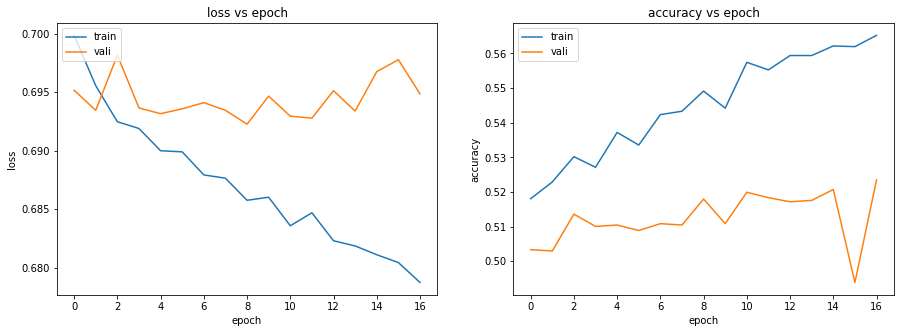

None


In [11]:
# accuracy and loss vs epoch for model 2
print(standard_plot(tuning2))

In [12]:
#Predict Accuracy

pred_test2 = model2.predict_classes(test_df)
pred_train2 = model2.predict_classes(train_df)

#Training Accuracy
train_classes2 = train_label
print(f'The training accuracy for model 2 is: {round(accuracy_score(train_classes2,pred_train2),4):.2%}')

#Test Accuracy
test_classes2 = test_label
print(f'The test accuracy for model 2 is: {round(accuracy_score(test_classes2,pred_test2),4):.2%}')

The training accuracy for model 2 is: 56.88%
The test accuracy for model 2 is: 52.62%


In [13]:
# Model 2 Analysis
'''
The test accuracy was not able to breach 52 % and the model is overfitted by a good margin.
This model seems to be performing better than the first model.
'''

'\nThe test accuracy was not able to breach 52 % and the model is clearly overfitted by a good margin\n'

In [14]:
# Model 3

# Building Model 3
model3 = Sequential()
model3.add(Dense(200,input_shape=(train_df.shape[1],)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dense(200))
model3.add(Activation('relu'))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                

In [15]:
# Training Model 3
model3.compile(loss='binary_crossentropy', optimizer = 'SGD', metrics = 'accuracy')
tuning3 = model3.fit(train_df,train_label,epochs=150, batch_size=30, verbose=1,validation_split=0.2, 
                     callbacks=EarlyStopping(monitor='val_loss',patience = 8))

Epoch 1/150
338/338 [==============================] - 1s 3ms/step - loss: 0.7119 - accuracy: 0.5186 - val_loss: 0.7058 - val_accuracy: 0.5263
Epoch 2/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5449 - val_loss: 0.7137 - val_accuracy: 0.5101
Epoch 3/150
338/338 [==============================] - 1s 3ms/step - loss: 0.6780 - accuracy: 0.5725 - val_loss: 0.7104 - val_accuracy: 0.5207
Epoch 4/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6713 - accuracy: 0.5792 - val_loss: 0.7100 - val_accuracy: 0.5049
Epoch 5/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6638 - accuracy: 0.6029 - val_loss: 0.7166 - val_accuracy: 0.5120
Epoch 6/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6570 - accuracy: 0.6033 - val_loss: 0.7182 - val_accuracy: 0.5120
Epoch 7/150
338/338 [==============================] - 1s 2ms/step - loss: 0.6511 - accuracy: 0.6163 - val_loss: 0.7272 - val_accuracy: 0.5006

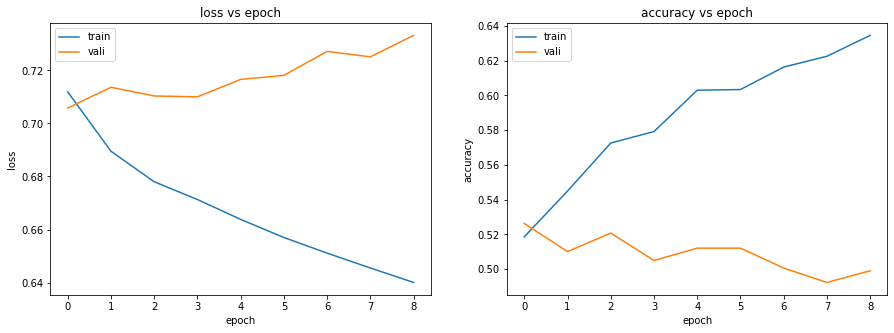

None


In [16]:
# accuracy and loss vs epoch for model 3
print(standard_plot(tuning3))

In [17]:
#Predict Accuracy

pred_test3 = model3.predict_classes(test_df)
pred_train3 = model3.predict_classes(train_df)

#Training Accuracy
train_classes3 = train_label
print(f'The training accuracy for model 3 is: {round(accuracy_score(train_classes3,pred_train3),4):.2%}')

#Test Accuracy
test_classes3 = test_label
print(f'The test accuracy for model 3 is: {round(accuracy_score(test_classes3,pred_test3),4):.2%}')

The training accuracy for model 3 is: 62.29%
The test accuracy for model 3 is: 48.98%


In [18]:
# Model 3 Analysis
'''
The accuracy is even lower than the first 2 models and it shows even greater overfitting in this case than other models
'''

'\nThe accuracy is even lower than the first 2 models and it shows even greater overfitting in this case than other models\n'

In [19]:
# Conclusion
'''
In conclusion it appears as though model 2 is the best due to the higher test accuracy.
Due to the lower sample size all models had a low test accuracy, and maybe with data augmentation
we can increase the sample size and thus the accuracy
'''

'\nIn conclusion it appears as though model 1 is the best due to the higher test accuracy.\nFor some reason model 3 had a significant amount of overfitting\n'